In [1]:
import matplotlib.pyplot as plt

import datamol as dm

### Common functions

In [2]:
# Mol from a smiles
mol = dm.to_mol("O=C(C)Oc1ccccc1C(=O)O", sanitize=True)

In [3]:
# Morgan fingerprint
fp = dm.to_fp(mol)
fp

array([1, 1, 1, ..., 0, 0, 0])

In [4]:
# Generate a selfies
selfies = dm.to_selfies(mol)
selfies

'[C][C][Branch1_2][C][=O][O][C][=C][C][=C][C][=C][Ring1][Branch1_2][C][Branch1_2][C][=O][O]'

In [5]:
# Get InChi
inchi = dm.to_inchi(mol)
inchi

'InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)'

### Dataframe and list of molecules

In [6]:
# Load a built-in dataset (only for demonstration purposes)
data = dm.data.freesolv()

# Make a molecule column from the smiles column
data = dm.data.freesolv()
data['mol'] = data["smiles"].apply(lambda x: dm.to_mol(x))

data.head()

,iupac,smiles,expt,calc,mol
0,"4-methoxy-N,N-dimethyl-benzamide",CN(C)C(=O)c1ccc(cc1)OC,-11.01,-9.625,<rdkit.Chem.rdchem.Mol object at 0x7f4d349f0c10>
1,methanesulfonyl chloride,CS(=O)(=O)Cl,-4.87,-6.219,<rdkit.Chem.rdchem.Mol object at 0x7f4d349f0c60>
2,3-methylbut-1-ene,CC(C)C=C,1.83,2.452,<rdkit.Chem.rdchem.Mol object at 0x7f4d349f0d50>
3,2-ethylpyrazine,CCc1cnccn1,-5.45,-5.809,<rdkit.Chem.rdchem.Mol object at 0x7f4d349f0bc0>
4,heptan-1-ol,CCCCCCCO,-4.21,-2.917,<rdkit.Chem.rdchem.Mol object at 0x7f4d349f0b70>


In [7]:
# Convert a dataframe to a list of mols
data = dm.data.freesolv()
mols = dm.from_df(data, smiles_column="smiles")
mols[:5]

In [8]:
# Convert a list of mols to a dataframe
df = dm.to_df(mols)
df.head()

,smiles,iupac,expt,calc
0,COc1ccc(C(=O)N(C)C)cc1,"4-methoxy-N,N-dimethyl-benzamide",-11.01,-9.625
1,CS(=O)(=O)Cl,methanesulfonyl chloride,-4.87,-6.219
2,C=CC(C)C,3-methylbut-1-ene,1.83,2.452
3,CCc1cnccn1,2-ethylpyrazine,-5.45,-5.809
4,CCCCCCCO,heptan-1-ol,-4.21,-2.917


### More advanced computation

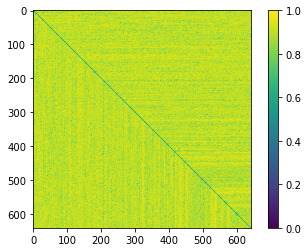

In [10]:
# Compute the pairwise Tanimoto similarity distance using Morgan fingerprints.
data = dm.data.freesolv()
data = dm.data.freesolv()
data['mol'] = data["smiles"].apply(lambda x: dm.to_mol(x))

mols = data['mol'].to_list()
dist_mat, valid_idx = dm.pdist(mols, n_jobs=None)
plt.imshow(dist_mat)
plt.colorbar()

### Parallelize anything

In [11]:
# Easy parallelization
def compute_something(mol):
    # just a fake computation
    result = mol.GetNumAtoms() ** 0.5
    return mol, result
    
data = dm.data.freesolv()
data['mol'] = data["smiles"].apply(lambda x: dm.to_mol(x))

results = dm.parallelized(compute_something, data['mol'].tolist(), n_jobs=None)
results[:5]

[(<rdkit.Chem.rdchem.Mol at 0x7f4d347318a0>, 3.605551275463989),
 (<rdkit.Chem.rdchem.Mol at 0x7f4d34731850>, 2.23606797749979),
 (<rdkit.Chem.rdchem.Mol at 0x7f4d34731760>, 2.23606797749979),
 (<rdkit.Chem.rdchem.Mol at 0x7f4d34731710>, 2.8284271247461903),
 (<rdkit.Chem.rdchem.Mol at 0x7f4d347316c0>, 2.8284271247461903)]